In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

In [3]:
data_processed_dir = './data/processed'


from utils_data import load_dataset

dataset_name = 'airbnb'

df_discretized, target_col, type_outcome = load_dataset(dataset_name, use_stored=True)
df_discretized.shape

(26001, 25)

In [4]:
abbreviations = {"host_is_superhost": "superhost", "number_of_reviews":"#reviews", \
              "neighbourhood_group_cleansed":"neigh_group", 
              "host_neighbourhood":"host_neigh",\
              "New York, New York, United States":"New York", 
              'host_identity_verified': 'host_verified',
              "apartment":"apt", 'first_review_year': 'years_first_rev',
               'last_review_year': 'years_last_rev', 'years_first_rev' : 'yrs_1rev',
               'host_has_profile_pic': 'pic', 'host_verified': 'verified',
               'host_since_year': 'yrs_host', 'host_response_rate': 'response_rate',
               '#reviews_l30d': '#rev_l30d', 'bedrooms': 'bedr.'}

abbreviations_2 = abbreviations.copy()
abbreviations_2.update({'=> ': '>', '=<= ': '$\le$', '_': '\_', '#': '\#', '=<=': '$\le$', '=>':'>'})
abbreviations_3 = abbreviations.copy()
abbreviations_3.update({'=> ': '>', '=<= ': '≤', '=>': '>', '=<=': '≤'})

<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:13: SyntaxWarning: invalid escape sequence '\_'
<>:13: SyntaxWarning: invalid escape sequence '\#'
<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:13: SyntaxWarning: invalid escape sequence '\_'
<>:13: SyntaxWarning: invalid escape sequence '\#'
<>:13: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_2028403/2684680947.py:13: SyntaxWarning: invalid escape sequence '\l'
  abbreviations_2.update({'=> ': '>', '=<= ': '$\le$', '_': '\_', '#': '\#', '=<=': '$\le$', '=>':'>'})
/tmp/ipykernel_2028403/2684680947.py:13: SyntaxWarning: invalid escape sequence '\_'
  abbreviations_2.update({'=> ': '>', '=<= ': '$\le$', '_': '\_', '#': '\#', '=<=': '$\le$', '=>':'>'})
/tmp/ipykernel_2028403/2684680947.py:13: SyntaxWarning: invalid escape sequence '\#'
  abbreviations_2.update({'=> ': '>', '=<= ': '$\le$', '_': '\_', '#': '\#', '=<=': '$\le$', '=>':'>'})
/tmp/ipykernel_2028403/26

# DivExplorer - get pattern -  ratings

The other review scores are correlated with our target review_scores_rating.
We now analyze the divergence for review_scores_rating when the review rating are removed from the analysis.

In [5]:
min_support_count = 1000
min_support = min_support_count/len(df_discretized)

min_support = 0.05

In [6]:
from divexplorer import DivergenceExplorer


fp_diver = DivergenceExplorer(df_discretized)

In [7]:
import resource

def limit_memory(max_mem_mb):
    """Limit memory usage of the current notebook process."""
    soft, hard = max_mem_mb * 1024 * 1024, max_mem_mb * 1024 * 1024
    resource.setrlimit(resource.RLIMIT_AS, (soft, hard))

# Example: Limit the notebook to 2 GB of memory
limit_memory(10*1024)

In [8]:
## Get patterns

In [9]:
import time
try:
    start_time = time.time()
    subgroups = fp_diver.get_pattern_divergence(min_support=min_support, quantitative_outcomes=[target_col])
    print("--- %s seconds ---" % (time.time() - start_time))
except MemoryError:
    print("Memory limit exceeded!")

--- 36.479875802993774 seconds ---


In [10]:
pd.set_option('display.max_colwidth', None)

In [11]:
from divexplorer import DivergencePatternProcessor


fp_details = DivergencePatternProcessor(subgroups, target_col)

In [12]:
try:
    start_time = time.time()
    patterns = fp_details.get_patterns()
    print("--- %s seconds ---" % (time.time() - start_time))
except MemoryError:
    print("Memory limit exceeded!")

--- 0.035738468170166016 seconds ---


In [13]:
cols = ['itemset', 'support', f"{target_col}_div", f"{target_col}_t"]

## Get highest and lowest divergence

In [14]:
from utils import printable

In [15]:
ids = [0, 1, 2, -1, -2, -3]
subgroups_print = patterns[cols].sort_values(by=[f"{target_col}_div", f'{target_col}_t'], ascending=[False, False]).iloc[ids]

subgroups_print_1 = printable(subgroups_print.copy(), target_col, abbreviations=abbreviations, round_v=3)

display(subgroups_print_1)

subgroups_print_2 = printable(subgroups_print.copy(), target_col, abbreviations=abbreviations_2, round_v=3)

print(subgroups_print_2.astype(str).to_latex(index=False, escape=False))

,itemset,support,review_scores_rating_div,review_scores_rating_t
151485,"#amenities=>32.0, yrs_1rev=<=2.0, superhost=t, response_rate=>99.0, instant_bookable=f, years_last_rev=<=2.0",0.054,0.189,36.6
151776,"#amenities=>32.0, yrs_1rev=<=2.0, superhost=t, response_rate=>99.0, instant_bookable=f",0.054,0.189,36.6
146931,"#amenities=>32.0, yrs_1rev=<=2.0, superhost=t, instant_bookable=f, shared_bathroom=0",0.055,0.187,32.4
172781,"#amenities=<=16.0, yrs_1rev=<=2.0, superhost=f, years_last_rev=<=2.0, #rev_l30d=0",0.052,-0.299,12.0
172780,"#amenities=<=16.0, yrs_1rev=<=2.0, superhost=f, #rev_l30d=0",0.052,-0.299,12.0
165275,"accommodates=<=2.0, bedr.=<=1.0, yrs_1rev=<=2.0, verified=t, superhost=f, yrs_host=<=6.0, years_last_rev=<=2.0, #rev_l30d=0",0.053,-0.297,12.7


\begin{tabular}{llll}
\toprule
itemset & support & review_scores_rating_div & review_scores_rating_t \\
\midrule
\#amenities>32.0, yrs\_1rev$\le$2.0, superhost=t, response\_rate>99.0, instant\_bookable=f, years\_last\_rev$\le$2.0 & 0.054 & 0.189 & 36.6 \\
\#amenities>32.0, yrs\_1rev$\le$2.0, superhost=t, response\_rate>99.0, instant\_bookable=f & 0.054 & 0.189 & 36.6 \\
\#amenities>32.0, yrs\_1rev$\le$2.0, superhost=t, instant\_bookable=f, shared\_bathroom=0 & 0.055 & 0.187 & 32.4 \\
\#amenities$\le$16.0, yrs\_1rev$\le$2.0, superhost=f, years\_last\_rev$\le$2.0, \#rev\_l30d=0 & 0.052 & -0.299 & 12.0 \\
\#amenities$\le$16.0, yrs\_1rev$\le$2.0, superhost=f, \#rev\_l30d=0 & 0.052 & -0.299 & 12.0 \\
accommodates$\le$2.0, bedr.$\le$1.0, yrs\_1rev$\le$2.0, verified=t, superhost=f, yrs\_host$\le$6.0, years\_last\_rev$\le$2.0, \#rev\_l30d=0 & 0.053 & -0.297 & 12.7 \\
\bottomrule
\end{tabular}



In [17]:
patterns.loc[patterns['itemset']==frozenset()].iloc[0][target_col].round(3)

4.725

# Shapley

In [60]:
itemset_top, itemset_bot = tuple(subgroups.sort_values(by=[f"{target_col}_div", f"{target_col}_t"], ascending=[False, False]).iloc[[0,-1]].itemset.values)

In [61]:
shapley_values_top = fp_details.shapley_value(itemset_top)
shapley_values_bot = fp_details.shapley_value(itemset_bot)

shapley_values_top = dict(sorted(shapley_values_top.items(), key=lambda item: item[1], reverse=False))
shapley_values_bot = dict(sorted(shapley_values_bot.items(), key=lambda item: item[1], reverse=False))

from utils import abbreviate_dict
shapley_values_top = abbreviate_dict(shapley_values_top, abbreviations_3)
shapley_values_bot = abbreviate_dict(shapley_values_bot, abbreviations_3)

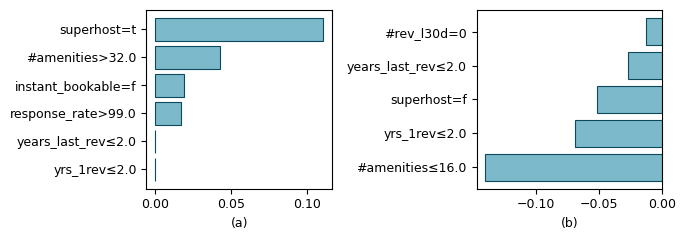

In [62]:
from utils import plot_comparison_ShapleyValues


plot_comparison_ShapleyValues(shapley_values_top, shapley_values_bot,
    size_fig=(7, 2.5),
    shared_items=False,
    save_fig=True,
    name_fig='newyork_airbnb_shap_top_last_0.05',
    labelsize=9,
    subcaption=True,
    
)

# Get threshold

In [37]:
# th_perc = 0.003
# th = np.round(th_perc * subgroups[target_col].max(), 4)

# th = 0.01
1

1

### 0,01

In [66]:
import numpy as np

th = 0.01

print(f"Threshold: {th}")

try:
    start_time = time.time()
    patterns_th = fp_details.get_patterns(th_redundancy=th)
    print("--- %s seconds ---" % (time.time() - start_time))
except MemoryError:
    print("Memory limit exceeded!")
print(patterns_th.shape, subgroups.shape)       

Threshold: 0.01
--- 1.092766284942627 seconds ---
(7126, 7) (191987, 7)


In [69]:
# Calculating the percentage reduction in itemsets
original_itemsets = subgroups.shape[0]
reduced_itemsets = patterns_th.shape[0]

reduction_percentage = ((original_itemsets - reduced_itemsets) / original_itemsets) * 100
reduction_percentage

96.28829035299266

In [70]:
ids = [0, 1, 2, -1, -2, -3,]

subgroups_print = patterns_th[cols].sort_values(by=[f"{target_col}_div", f'{target_col}_t'], ascending=[False, False]).iloc[ids]

subgroups_print_1 = printable(subgroups_print.copy(), target_col, abbreviations=abbreviations, round_v=3)

display(subgroups_print_1)

subgroups_print_2 = printable(subgroups_print.copy(), target_col, abbreviations=abbreviations_2, round_v=3)

print(subgroups_print_2.astype(str).to_latex(index=False, escape=False))

,itemset,support,review_scores_rating_div,review_scores_rating_t
73084,"#amenities=>32.0, yrs_1rev=<=2.0, superhost=t, instant_bookable=f",0.069,0.185,36.1
62503,"yrs_1rev=<=2.0, superhost=t, response_rate=>99.0, instant_bookable=f",0.073,0.179,35.8
162315,"yrs_1rev=<=2.0, superhost=t, response_rate=>99.0, room_type=Entire home/apt",0.053,0.175,32.3
172780,"#amenities=<=16.0, yrs_1rev=<=2.0, superhost=f, #rev_l30d=0",0.052,-0.299,12.0
165312,"accommodates=<=2.0, bedr.=<=1.0, yrs_1rev=<=2.0, verified=t, superhost=f, yrs_host=<=6.0, #rev_l30d=0",0.053,-0.297,12.7
191901,"yrs_1rev=<=2.0, superhost=f, instant_bookable=t, #rev_l30d=0",0.050,-0.295,12.8


\begin{tabular}{llll}
\toprule
itemset & support & review_scores_rating_div & review_scores_rating_t \\
\midrule
\#amenities>32.0, yrs\_1rev$\le$2.0, superhost=t, instant\_bookable=f & 0.069 & 0.185 & 36.1 \\
yrs\_1rev$\le$2.0, superhost=t, response\_rate>99.0, instant\_bookable=f & 0.073 & 0.179 & 35.8 \\
yrs\_1rev$\le$2.0, superhost=t, response\_rate>99.0, room\_type=Entire home/apt & 0.053 & 0.175 & 32.3 \\
\#amenities$\le$16.0, yrs\_1rev$\le$2.0, superhost=f, \#rev\_l30d=0 & 0.052 & -0.299 & 12.0 \\
accommodates$\le$2.0, bedr.$\le$1.0, yrs\_1rev$\le$2.0, verified=t, superhost=f, yrs\_host$\le$6.0, \#rev\_l30d=0 & 0.053 & -0.297 & 12.7 \\
yrs\_1rev$\le$2.0, superhost=f, instant\_bookable=t, \#rev\_l30d=0 & 0.05 & -0.295 & 12.8 \\
\bottomrule
\end{tabular}



### 0.02

In [71]:
import numpy as np

th = 0.02
print(f"Threshold: {th}")

try:
    start_time = time.time()
    patterns_th = fp_details.get_patterns(th_redundancy=th)
    print("--- %s seconds ---" % (time.time() - start_time))
except MemoryError:
    print("Memory limit exceeded!")

Threshold: 0.02
--- 1.170029640197754 seconds ---


In [74]:
# Calculating the percentage reduction in itemsets
original_itemsets = subgroups.shape[0]-1
reduced_itemsets = patterns_th.shape[0]-1

print(reduced_itemsets)
reduction_percentage = ((original_itemsets - reduced_itemsets) / original_itemsets) * 100
reduction_percentage

1842


99.0405550404717

In [54]:
ids = [0, 1, 2, -1, -2, -3,]

subgroups_print = patterns_th[cols].sort_values(by=[f"{target_col}_div", f'{target_col}_t'], ascending=[False, False]).iloc[ids]

subgroups_print_1 = printable(subgroups_print.copy(), target_col, abbreviations=abbreviations, round_v=3)

display(subgroups_print_1)

subgroups_print_2 = printable(subgroups_print.copy(), target_col, abbreviations=abbreviations_2, round_v=3)

print(subgroups_print_2.astype(str).to_latex(index=False, escape=False))

,itemset,support,review_scores_rating_div,review_scores_rating_t
886,superhost=t,0.250,0.137,36.4
101162,"#amenities=>32.0, yrs_host=>9.0, neigh_group=Brooklyn",0.062,0.137,24.7
109029,"response_rate=>99.0, yrs_host=>9.0, neigh_group=Brooklyn",0.061,0.129,23.1
191901,"yrs_1rev=<=2.0, superhost=f, instant_bookable=t, #rev_l30d=0",0.050,-0.295,12.8
179285,"superhost=f, response_rate=<=99.0, yrs_host=<=6.0, #rev_l30d=0",0.051,-0.290,13.3
185435,"#amenities=<=16.0, accommodates=<=2.0, bedr.=<=1.0, superhost=f, years_last_rev=<=2.0",0.051,-0.285,12.6


\begin{tabular}{llll}
\toprule
itemset & support & review_scores_rating_div & review_scores_rating_t \\
\midrule
superhost=t & 0.25 & 0.137 & 36.4 \\
\#amenities>32.0, yrs\_host>9.0, neigh\_group=Brooklyn & 0.062 & 0.137 & 24.7 \\
response\_rate>99.0, yrs\_host>9.0, neigh\_group=Brooklyn & 0.061 & 0.129 & 23.1 \\
yrs\_1rev$\le$2.0, superhost=f, instant\_bookable=t, \#rev\_l30d=0 & 0.05 & -0.295 & 12.8 \\
superhost=f, response\_rate$\le$99.0, yrs\_host$\le$6.0, \#rev\_l30d=0 & 0.051 & -0.29 & 13.3 \\
\#amenities$\le$16.0, accommodates$\le$2.0, bedr.$\le$1.0, superhost=f, years\_last\_rev$\le$2.0 & 0.051 & -0.285 & 12.6 \\
\bottomrule
\end{tabular}



# Global

In [24]:
try:
    start_time = time.time()
    
    gsv = fp_details.global_shapley_value()
    print(f'{round(time.time() - start_time, 2)} seconds')
except MemoryError:
    print("Memory limit exceeded!")

35.85 seconds


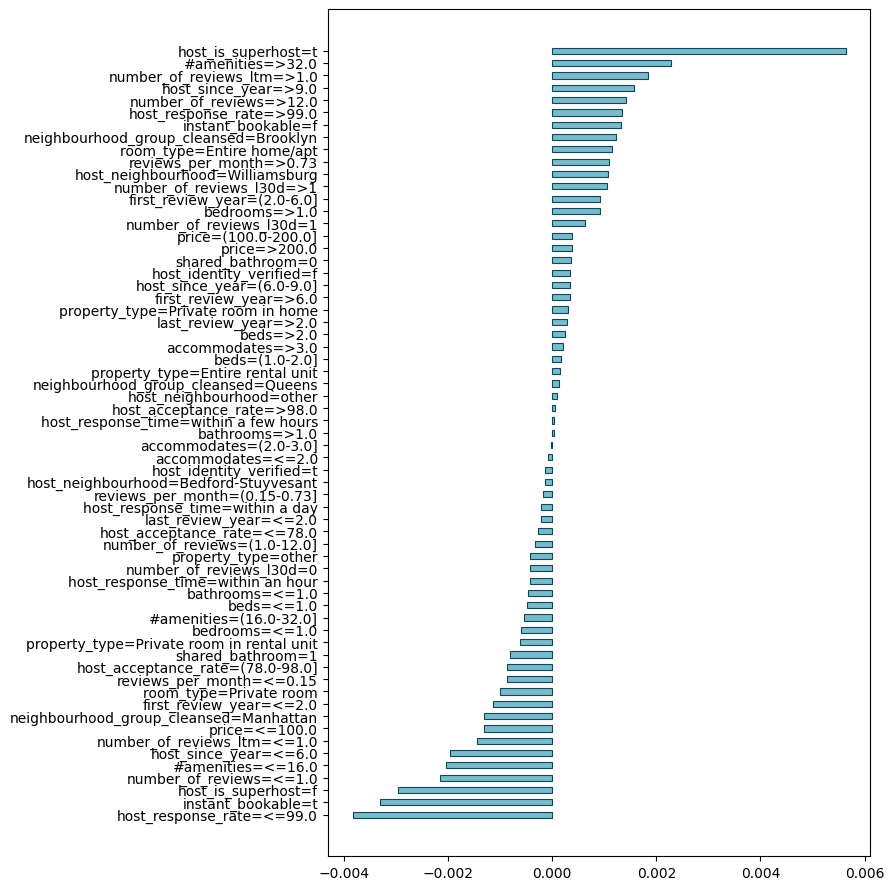

In [25]:
fp_details.plot_shapley_value(shapley_values=gsv, figsize=(7,11))  

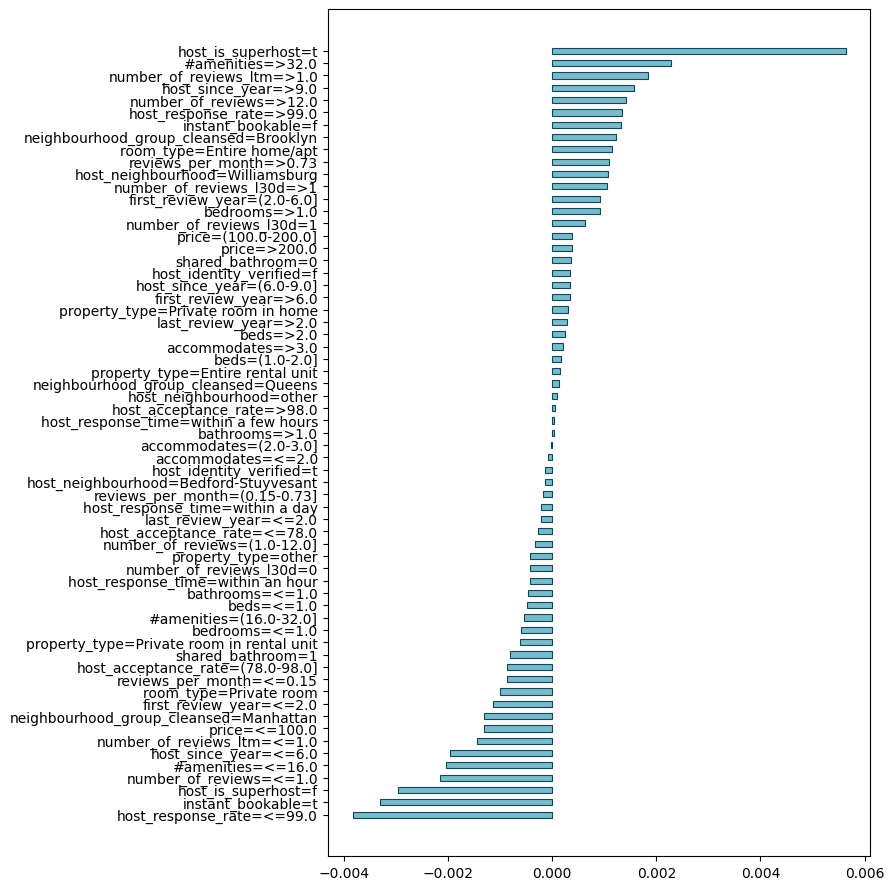

In [26]:
fp_details.plot_shapley_value(shapley_values=gsv, figsize=(7,11))  

In [27]:
individual_divergence = fp_details.patterns.loc[fp_details.patterns['length']==1][['itemset', f'{target_col}_div']].set_index('itemset').to_dict()[f'{target_col}_div']

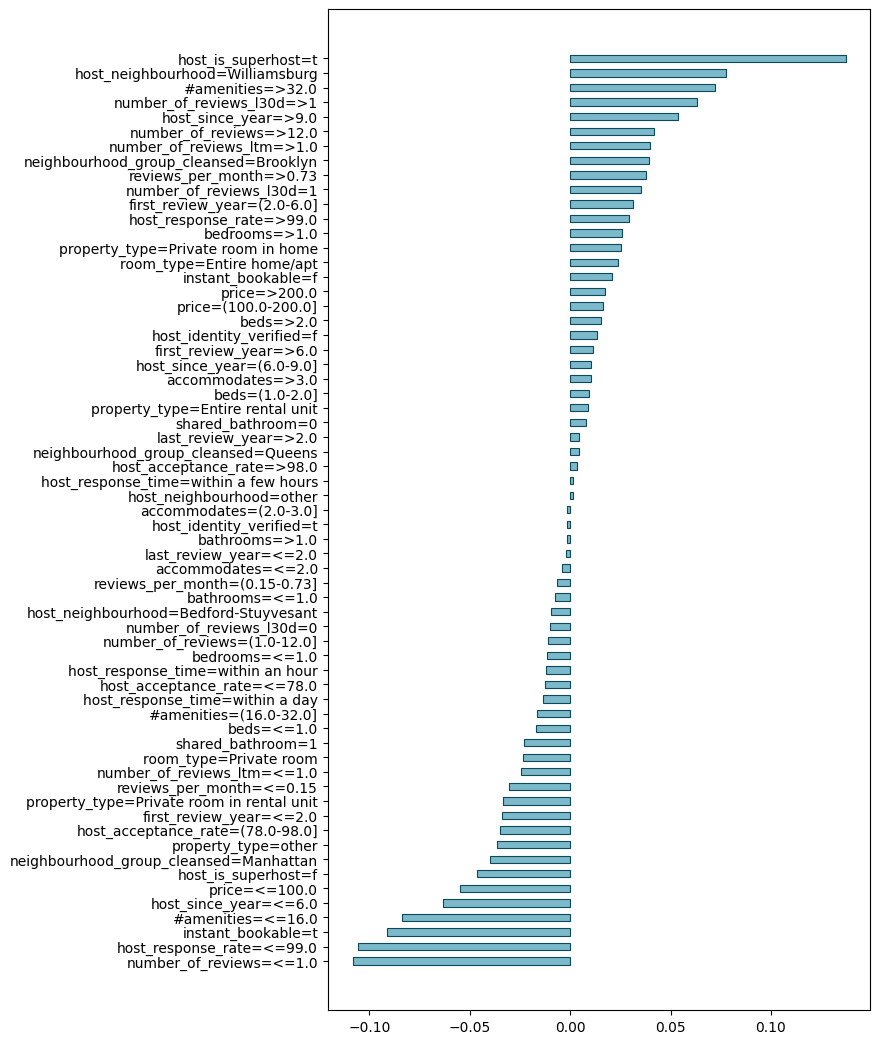

In [28]:
fp_details.plot_shapley_value(shapley_values=individual_divergence, figsize=(7,13))

In [31]:
df_discretized[df_discretized['instant_bookable']=='t'][target_col].mean(), df_discretized[df_discretized['instant_bookable']=='f'][target_col].mean(), df_discretized[target_col].mean()

(np.float64(4.634158945851349),
 np.float64(4.746054199772986),
 np.float64(4.725152109534249))

## GSV Top 25

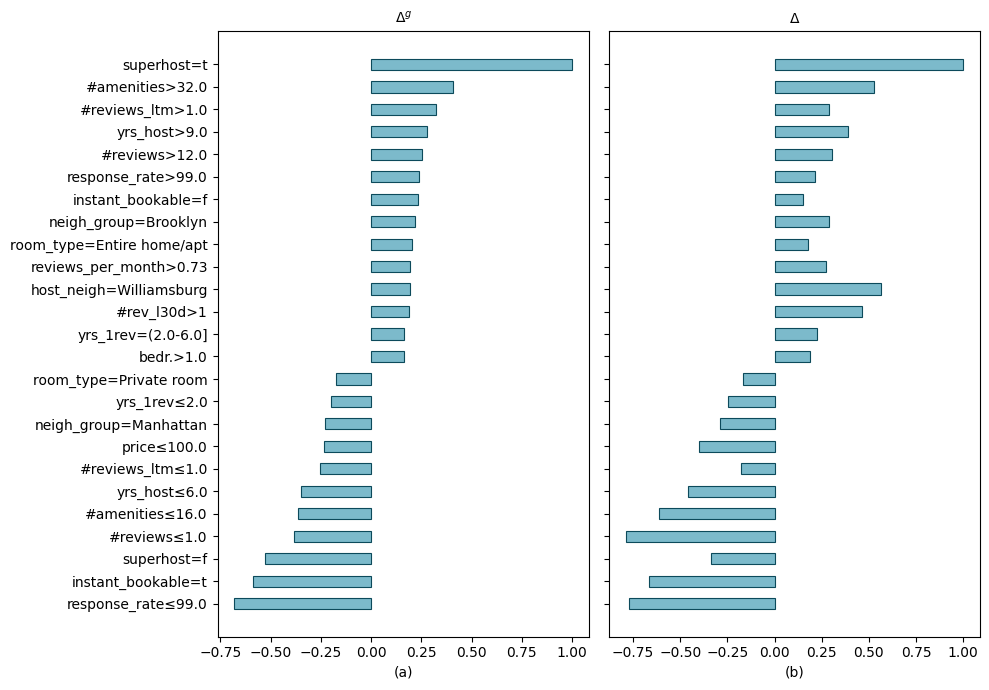

In [65]:
from utils import plot_comparison_ShapleyValues, normalize_max, abbreviate_dict

K=25
topK_global = {k:v for k,v in gsv.items() if k in sorted(gsv, key=lambda x: abs(gsv[x]))[::-1][:K]}
topK_indiv = {k:v for k,v in individual_divergence.items() if k in topK_global.keys()}

plot_comparison_ShapleyValues(normalize_max(abbreviate_dict(topK_global, abbreviations_3)),
                      normalize_max(abbreviate_dict(topK_indiv, abbreviations_3)),
                     title=[f"$\\Delta^g$", f"$\\Delta$"], \
                      labelsize=10, height=0.5, size_fig=(10,7),\
                     subcaption=True,
                        save_fig=True, 
                     name_fig=f"./{dataset_name}_gsv_compare_{min_support}")
